# Exploraty Data Analysis DAX index

## Summary

[1.Loading data](#1.Loading-data)
--
[2.Cleaning data](#2.Cleaning-data)
--
[2.1 Empty cells](#2.1-Empty-cells) <br>
[2.2 Zero values](#2.2-Zero-values)

[3.From 2000 to ...](#3.From-2000-to-...)
--
[4.Components](#4.Components)
--
[4.1Webscrapping data](#4.1Webscrapping-data)

[5.Performance](#5.Performance)
--
[6.Close Analysis](#6.Close-Analysis)
--
[7.Features engineering](#7.Features-engineering)
--
[7.1 EMA](#7.1-EMA) <br>
[7.2 RSI](#7.2-RSI) <br>
[7.3 MACD](#7.3-MACD)

[8.Correlation](#8.Correlation)
--
[8.1 Index worldwilde](#8.1-Index-worldwilde) <br>
[8.2 Index by differents activities](#8.2-Index-by-differents-activities)

[9.Correlation Matrix](#9.Correlation-Matrix)
--

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import mplfinance as mpf
import seaborn as sns

## 1.Loading data


In [2]:
dax_ticker = yf.Ticker("^GDAXI")
historical_data = dax_ticker.history(period="max")
historical_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1987-12-30 00:00:00+01:00,1005.190002,1005.190002,1005.190002,1005.190002,0,0.0,0.0
1988-01-04 00:00:00+01:00,956.489990,956.489990,956.489990,956.489990,0,0.0,0.0
1988-01-05 00:00:00+01:00,996.099976,996.099976,996.099976,996.099976,0,0.0,0.0
1988-01-06 00:00:00+01:00,1006.010010,1006.010010,1006.010010,1006.010010,0,0.0,0.0
1988-01-07 00:00:00+01:00,1014.469971,1014.469971,1014.469971,1014.469971,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-05-29 00:00:00+02:00,16064.129883,16079.730469,15925.219727,15952.730469,24247000,0.0,0.0
2023-05-30 00:00:00+02:00,15962.309570,16058.429688,15889.459961,15908.910156,54563500,0.0,0.0
2023-05-31 00:00:00+02:00,15757.429688,15871.700195,15629.120117,15664.019531,172555100,0.0,0.0


In [3]:
df = historical_data[["Open", "High", "Low", "Close", "Volume"]]
df

,Open,High,Low,Close,Volume
Date,,,,,
1987-12-30 00:00:00+01:00,1005.190002,1005.190002,1005.190002,1005.190002,0
1988-01-04 00:00:00+01:00,956.489990,956.489990,956.489990,956.489990,0
1988-01-05 00:00:00+01:00,996.099976,996.099976,996.099976,996.099976,0
1988-01-06 00:00:00+01:00,1006.010010,1006.010010,1006.010010,1006.010010,0
1988-01-07 00:00:00+01:00,1014.469971,1014.469971,1014.469971,1014.469971,0
...,...,...,...,...,...
2023-05-29 00:00:00+02:00,16064.129883,16079.730469,15925.219727,15952.730469,24247000
2023-05-30 00:00:00+02:00,15962.309570,16058.429688,15889.459961,15908.910156,54563500
2023-05-31 00:00:00+02:00,15757.429688,15871.700195,15629.120117,15664.019531,172555100


In [4]:
df.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

## 2.Cleaning data

### 2.1 Empty cells

In [5]:
missing_values = (df.isnull().sum())
missing_values

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

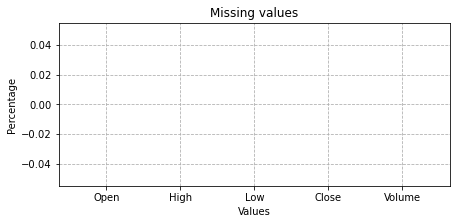

In [6]:
#Histogram
fig = plt.figure(figsize=(7, 3))
plt.bar(missing_values.index, missing_values.values)
plt.title("Missing values")
plt.xlabel("Values")
plt.ylabel("Percentage")
plt.grid(True, linestyle='--')

### 2.2 Zero values

In [7]:
Values_zero = (df == 0).sum()
Values_zero

Open         0
High         0
Low          0
Close        0
Volume    2974
dtype: int64

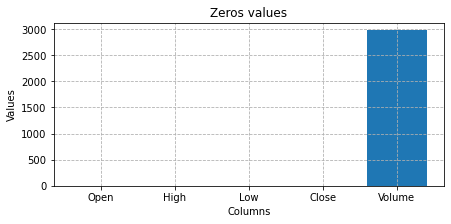

In [8]:
#Volums/Zeros
fig = plt.figure(figsize=(7, 3))
plt.bar(Values_zero.index, Values_zero.values)
plt.title("Zeros values")
plt.xlabel("Columns")
plt.ylabel("Values")
plt.grid(True, linestyle='--')

Text(0, 0.5, 'Values')

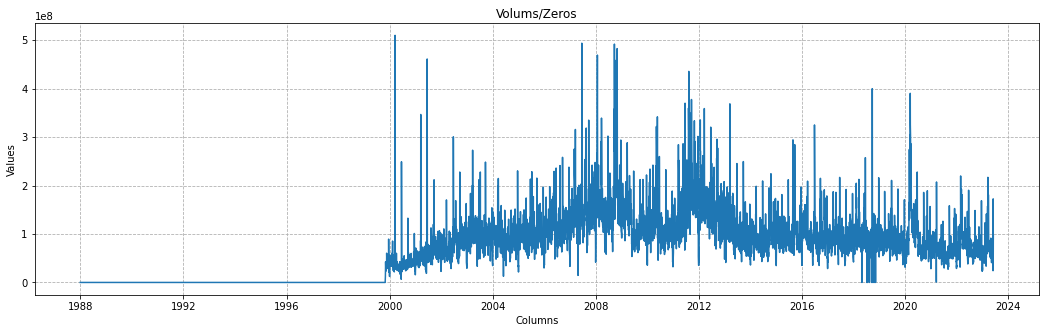

In [9]:
#Volums/Zeros graph
plt.figure(figsize=(18, 5))
plt.grid(True, linestyle='--')
plt.plot(df.index, df["Volume"])
plt.title("Volums/Zeros")
plt.xlabel("Columns")
plt.ylabel("Values")

## 3.From 2000 to ...

In [10]:
#Filter from 2000 to (max)
df = df.loc["2000-01-01":]
df

,Open,High,Low,Close,Volume
Date,,,,,
2000-01-03 00:00:00+01:00,6961.720215,7159.330078,6720.870117,6750.759766,43072500
2000-01-04 00:00:00+01:00,6747.240234,6755.359863,6510.459961,6586.950195,46678400
2000-01-05 00:00:00+01:00,6585.850098,6585.850098,6388.910156,6502.069824,52682800
2000-01-06 00:00:00+01:00,6501.450195,6539.310059,6402.629883,6474.919922,41180600
2000-01-07 00:00:00+01:00,6489.939941,6791.529785,6470.140137,6780.959961,56058900
...,...,...,...,...,...
2023-05-29 00:00:00+02:00,16064.129883,16079.730469,15925.219727,15952.730469,24247000
2023-05-30 00:00:00+02:00,15962.309570,16058.429688,15889.459961,15908.910156,54563500
2023-05-31 00:00:00+02:00,15757.429688,15871.700195,15629.120117,15664.019531,172555100


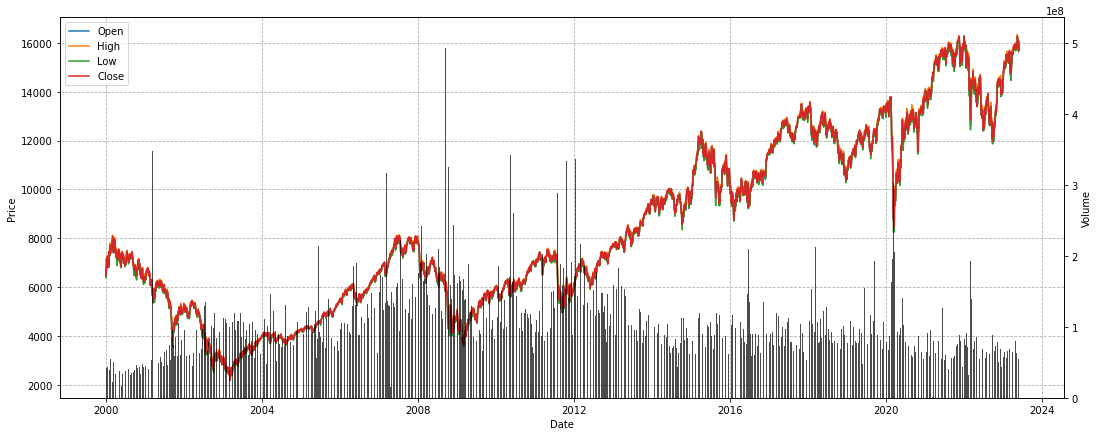

In [11]:
#fig,ax
fig, ax1 = plt.subplots(figsize=(18, 7))
plt.grid(True, linestyle='--')

#OHLC
ax1.plot(df.index, df["Open"], label="Open")
ax1.plot(df.index, df["High"], label="High")
ax1.plot(df.index, df["Low"], label="Low")
ax1.plot(df.index, df["Close"], label="Close")
ax1.set_ylabel("Price")
ax1.set_xlabel("Date")

#Volume column
ax2 = ax1.twinx()
ax2.bar(df.index, df["Volume"], alpha=0.7, color="black")
ax2.set_ylabel("Volume")

ax1.legend()

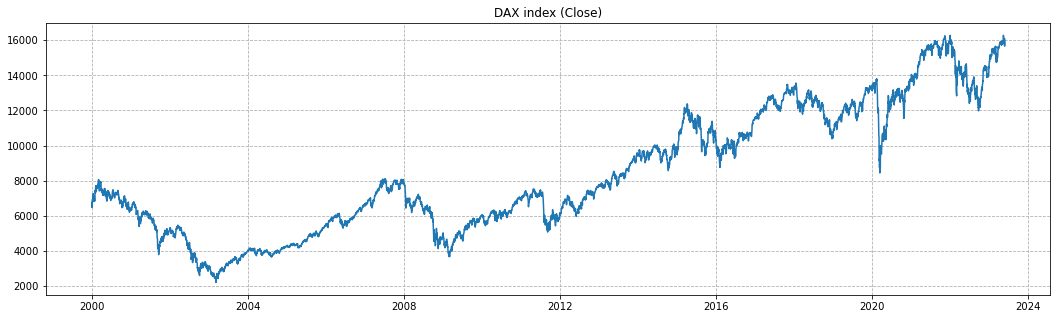

In [12]:
#Graph 2
plt.figure(figsize=(18, 5))
plt.grid(True, linestyle='--')
plt.plot(df.index, df["Close"])
_ = plt.title("DAX index (Close)")

## 4.Components

### 4.1Webscrapping data

In [13]:
#URL
url = 'https://en.wikipedia.org/wiki/DAX'
response = requests.get(url)

# Parse
soup = BeautifulSoup(response.content, 'html.parser')
table = soup.find('table', {'id': 'constituents'})

composition_data = []
for row in table.find_all('tr'):
    cells = row.find_all('td')
    
    if len(cells) > 0:
        data_row = [cell.get_text(strip=True) for cell in cells]
        composition_data.append(data_row)

for row in composition_data:
    print(row)

['', 'Adidas', 'Textile', 'ADS.DE', '2.0', '061,401 (2021)', '1924']
['', 'Airbus', 'Aerospace', 'AIR.DE', '6.0', '126.495 (2021)', '1970']
['', 'Allianz', 'Financial Services', 'ALV.DE', '7.1', '155,411 (2021)', '1890']
['', 'BASF', 'Basic Materials', 'BAS.DE', '3.5', '111,047 (2021)', '1865']
['', 'Bayer', 'Healthcare', 'BAYN.DE', '4.8', '099,637 (2021)', '1863']
['', 'Beiersdorf', 'Consumer goods', 'BEI.DE', '0.9', '020,567 (2021)', '1882']
['', 'BMW', 'Automobile', 'BMW.DE', '2.5', '118,909 (2021)', '1916']
['', 'Brenntag', 'Distribution', 'BNR.DE', '0.9', '017,200 (2021)', '1874']
['', 'Commerzbank', 'Financial Services', 'CBK.DE', '0.8', '040,181 (2021)', '1870']
['', 'Continental', 'Automotive', 'CON.DE', '0.6', '190,875 (2021)', '1871']
['', 'Covestro', 'Basic Materials', '1COV.DE', '0.6', '017,909 (2021)', '2015']
['', 'Daimler Truck', 'Automobile', 'DTG.DE', '1.1', '099,849 (2021)', '2021']
['', 'Deutsche Bank', 'Financial Services', 'DBK.DE', '1.6', '082,969 (2021)', '1870']

In [14]:
#Dataframe creation
df_components = pd.DataFrame(composition_data, columns=['Logo', 'Company', 'Activity sector', 'Ticker', 'Index weighting', 'Employees', 'Founded'])
df_components = df_components.iloc[:, 1:7]
df_components

,Company,Activity sector,Ticker,Index weighting,Employees,Founded
0,Adidas,Textile,ADS.DE,2.0,"061,401 (2021)",1924
1,Airbus,Aerospace,AIR.DE,6.0,126.495 (2021),1970
2,Allianz,Financial Services,ALV.DE,7.1,"155,411 (2021)",1890
3,BASF,Basic Materials,BAS.DE,3.5,"111,047 (2021)",1865
4,Bayer,Healthcare,BAYN.DE,4.8,"099,637 (2021)",1863
5,Beiersdorf,Consumer goods,BEI.DE,0.9,"020,567 (2021)",1882
6,BMW,Automobile,BMW.DE,2.5,"118,909 (2021)",1916
7,Brenntag,Distribution,BNR.DE,0.9,"017,200 (2021)",1874
8,Commerzbank,Financial Services,CBK.DE,0.8,"040,181 (2021)",1870
9,Continental,Automotive,CON.DE,0.6,"190,875 (2021)",1871


In [15]:
rheinmetall_index = df_components[df_components['Company'] == 'Rheinmetall'].index[0]
df_components.at[rheinmetall_index, 'Index weighting'] = '0.53'

df_components['Index weighting'] = df_components['Index weighting'].astype(float)
df_sorted = df_components.sort_values(by='Index weighting', ascending=False)
df_sorted

,Company,Activity sector,Ticker,Index weighting,Employees,Founded
31,SAP,Technology,SAP.DE,10.10,"107,415 (2021)",1972
33,Siemens,Industrials,SIE.DE,9.00,"303,000 (2021)",1847
2,Allianz,Financial Services,ALV.DE,7.10,"155,411 (2021)",1890
15,Deutsche Telekom,Communication Services,DTE.DE,6.50,"216,528 (2021)",1995
1,Airbus,Aerospace,AIR.DE,6.00,126.495 (2021),1970
22,Mercedes-Benz Group,Automobile,MBG.DE,4.80,"172,000 (2021)",1926
4,Bayer,Healthcare,BAYN.DE,4.80,"099,637 (2021)",1863
21,Infineon Technologies,Technology,IFX.DE,3.90,"050,280 (2021)",1999
25,Munich Re,Financial Services,MUV2.DE,3.60,"040,177 (2022)",1880
3,BASF,Basic Materials,BAS.DE,3.50,"111,047 (2021)",1865


Text(0.5, 1.0, 'DAX components plot Pie by capitalization')

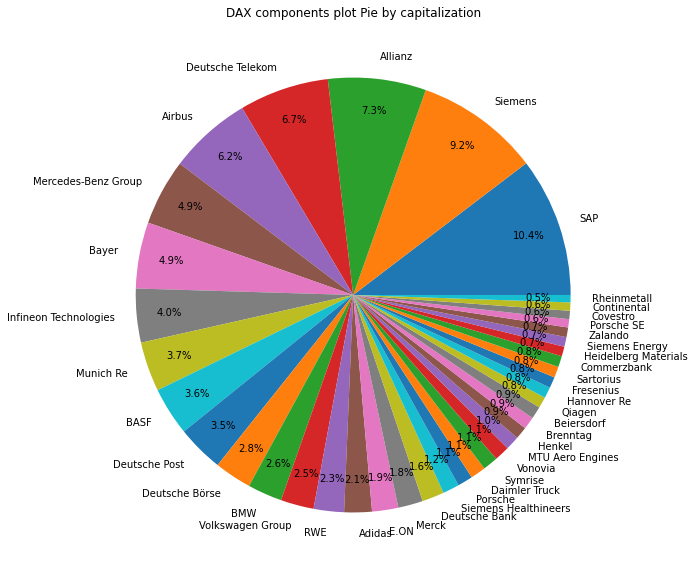

In [16]:
plt.figure(figsize=(10, 10))
plt.pie(df_sorted['Index weighting'], labels=df_sorted['Company'], autopct='%1.1f%%', pctdistance=0.85)

plt.title('DAX components plot Pie by capitalization')

In [17]:
distinct_sectors = df_components['Activity sector'].unique()
print(distinct_sectors)

['Textile' 'Aerospace' 'Financial Services' 'Basic Materials' 'Healthcare'
 'Consumer goods' 'Automobile' 'Distribution' 'Automotive' 'Industrials'
 'Communication Services' 'Utilities' 'Insurance' 'Consumer Goods'
 'Technology' 'Chemicals' 'Industrial' 'Energy technology' 'Real Estate'
 'E-Commerce']


Text(0.5, 1.0, 'DAX components plot Pie by activity sector')

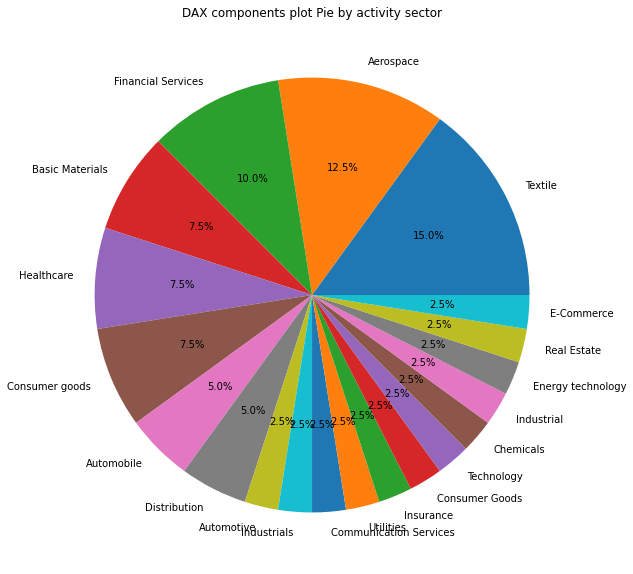

In [18]:
plt.figure(figsize=(10, 10))
plt.pie(df_components['Activity sector'].value_counts(), labels=distinct_sectors, autopct='%1.1f%%')

plt.title('DAX components plot Pie by activity sector')

In [19]:
#New activity sector allocation gathering
new_activity_sector = {
    'Adidas': 'Textile',
    'SAP': 'Technology',
    "Siemens": 'Technology',
    'Siemens Energy': 'Technology',
    'Infineon Technologies': 'Technology',
    'Deutsche Telekom': 'Communication',
    'Deutsche Post': 'Communication',
    'Airbus': 'Aerospace',
    'MTU Aero Engines': 'Aerospace',
    'Mercedes-Benz Group': 'Automobile',
    "Porsche SE": 'Automobile',
    'BMW': 'Automobile',
    'Volkswagen Group': 'Automobile',
    'Porsche': 'Automobile',
    'Daimler Truck': 'Automobile',
    'Bayer': 'Healthcare',
    'Merck': 'Healthcare',
    'Siemens Healthineers': 'Healthcare',
    'Fresenius': 'Healthcare',
    'Deutsche Bank': 'Financial Services',
    'Deutsche Börse': 'Financial Services',
    'Commerzbank': 'Financial Services',
    'E.ON': 'Utilities',
    'RWE': 'Utilities',
    'BASF': 'Basic Materials',
    'Heidelberg Materials': 'Basic Materials',
    'Covestro': 'Basic Materials',
    'Symrise': 'Chemicals',
    'Sartorius': 'Chemicals',
    'Qiagen': 'Chemicals',
    'Brenntag': 'Distribution',
    'Henkel': 'Consumer Goods',
    'Beiersdorf': 'Consumer Goods',
    'Hannover Re': 'Insurance',
    "Munich Re": 'Insurance',
    'Allianz': 'Insurance',
    'Rheinmetall': 'Industrial',
    'Vonovia': 'Real Estate',
    'Zalando': 'E-Commerce',
    'Siemens Energy': 'Technology',
    'Continental': 'Automotive',
    'Infineon Technologies': 'Technologies'
}
df_components['New Activity Sector'] = df_components['Company'].map(new_activity_sector)

In [20]:
df_sorted = df_components.sort_values(by='New Activity Sector', ascending=False)
df_sorted

,Company,Activity sector,Ticker,Index weighting,Employees,Founded,New Activity Sector
16,E.ON,Utilities,EOAN.DE,1.90,"078,126 (2021)",2000,Utilities
30,RWE,Utilities,RWE.DE,2.20,"018,246 (2021)",1898,Utilities
0,Adidas,Textile,ADS.DE,2.00,"061,401 (2021)",1924,Textile
34,Siemens Energy,Energy technology,ENR.DE,0.70,"092,000 (2021)",2020,Technology
33,Siemens,Industrials,SIE.DE,9.00,"303,000 (2021)",1847,Technology
31,SAP,Technology,SAP.DE,10.10,"107,415 (2021)",1972,Technology
21,Infineon Technologies,Technology,IFX.DE,3.90,"050,280 (2021)",1999,Technologies
38,Vonovia,Real Estate,VNA.DE,1.10,"015,900 (2022)",2001,Real Estate
25,Munich Re,Financial Services,MUV2.DE,3.60,"040,177 (2022)",1880,Insurance
2,Allianz,Financial Services,ALV.DE,7.10,"155,411 (2021)",1890,Insurance


Text(0.5, 1.0, 'News activity sectors allocation')

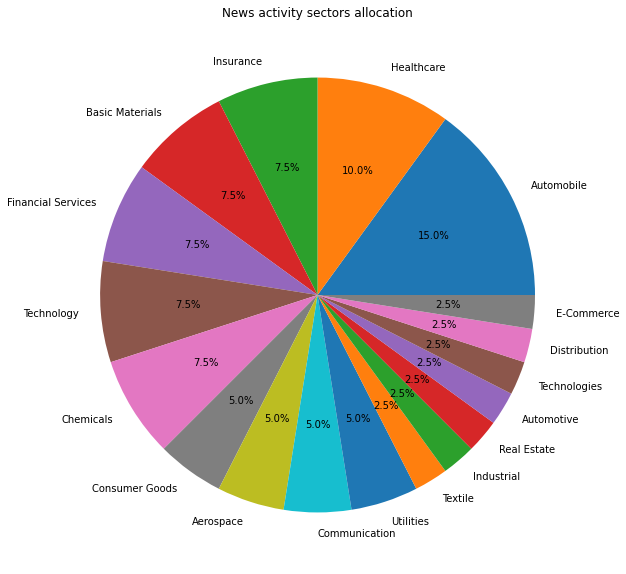

In [21]:
activity_sector_counts = df_components['New Activity Sector'].value_counts()

#plt.pie
plt.figure(figsize=(10, 10))
plt.pie(activity_sector_counts, labels=activity_sector_counts.index, autopct='%1.1f%%')
plt.title('News activity sectors allocation')

## 5.Performance

In [22]:
#Performance calculus
Performance = df["Close"].pct_change()
Performance

Date
2000-01-03 00:00:00+01:00         NaN
2000-01-04 00:00:00+01:00   -0.024265
2000-01-05 00:00:00+01:00   -0.012886
2000-01-06 00:00:00+01:00   -0.004176
2000-01-07 00:00:00+01:00    0.047265
                               ...   
2023-05-29 00:00:00+02:00   -0.001954
2023-05-30 00:00:00+02:00   -0.002747
2023-05-31 00:00:00+02:00   -0.015393
2023-06-01 00:00:00+02:00    0.012107
2023-06-02 00:00:00+02:00    0.012462
Name: Close, Length: 5946, dtype: float64

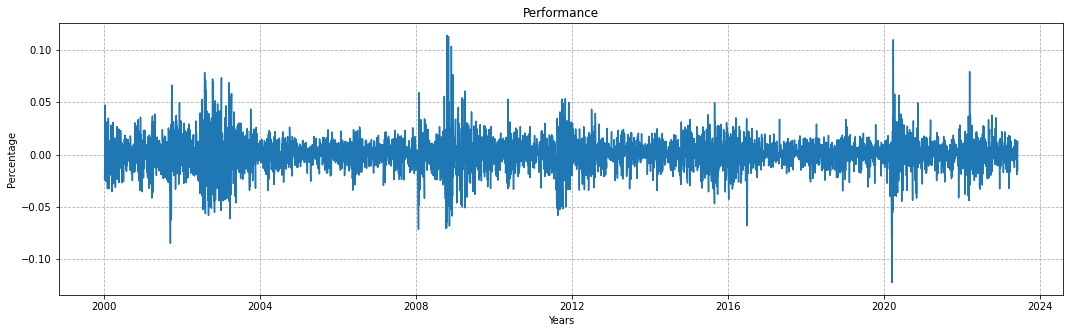

In [23]:
#Returns visualization
fig = plt.figure(figsize=(18, 5))
plt.grid(True, linestyle='--')
plt.plot(df.index, Performance)
plt.title("Performance")
plt.xlabel("Years")
_=plt.ylabel("Percentage")

In [24]:
#Performance %
Performance = df["Close"].pct_change()*100

#Average Performance
mean_Performance = Performance.mean() * 100
print("Average Performance:", "{:.2f}%".format(mean_Performance))

#Performance returns per year
mean_Performance_yearly_raw = Performance.groupby(Performance.index.year).mean() * 100
mean_Performance_yearly = mean_Performance_yearly_raw.apply(lambda x: "{:.2f}%".format(x))
print("Average Performance per year:")
print(mean_Performance_yearly)

#Better Performance
max_Performance = Performance.max()
max_Performance_date = Performance.idxmax()
print("Better Performance:", "{:.2f}%".format(max_Performance))
print("Date:", max_Performance_date.strftime("%Y-%m-%d"))

#Worse Performance
min_Performance = Performance.min()
min_Performance_date = Performance.idxmin()
print("Worse return:", "{:.2f}%".format(min_Performance))
print("Date:", min_Performance_date.strftime("%Y-%m-%d"))

Average Performance: 2.53%
Average Performance per year:
Date
2000     -0.78%
2001     -7.03%
2002    -19.69%
2003     14.42%
2004      3.24%
2005      9.62%
2006      8.26%
2007      8.46%
2008    -17.51%
2009     10.01%
2010      6.48%
2011     -4.55%
2012     10.79%
2013      9.43%
2014      1.59%
2015      4.71%
2016      3.47%
2017      4.90%
2018     -7.55%
2019      9.43%
2020      3.54%
2021      6.16%
2022     -4.06%
2023     13.74%
Name: Close, dtype: object
Better Performance: 11.40%
Date: 2008-10-13
Worse return: -12.24%
Date: 2020-03-12


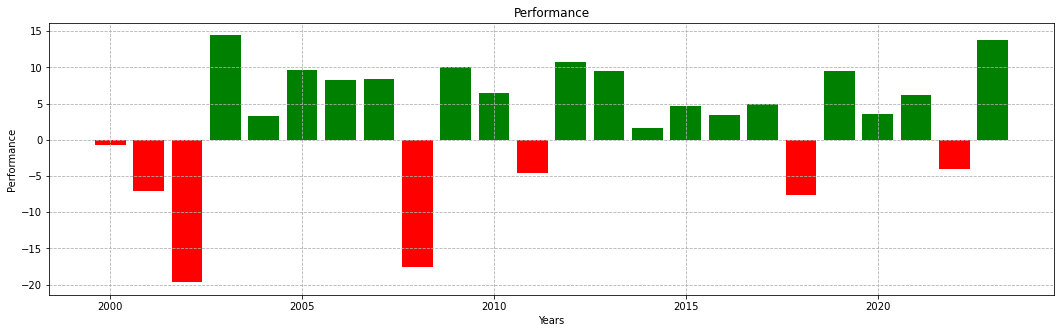

In [25]:
#fig,ax
fig, ax = plt.subplots(figsize=(18, 5))
plt.grid(True, linestyle='--')

#Performance colors
positive_Performance = mean_Performance_yearly_raw[mean_Performance_yearly_raw >= 0]
negative_Performance = mean_Performance_yearly_raw[mean_Performance_yearly_raw < 0]

#Histogram
ax.bar(positive_Performance.index, positive_Performance, color='green')
ax.bar(negative_Performance.index, negative_Performance, color='red')

ax.set_xlabel('Years')
ax.set_ylabel('Performance')
_=ax.set_title('Performance')

Text(0.5, 1.0, 'Performance 2')

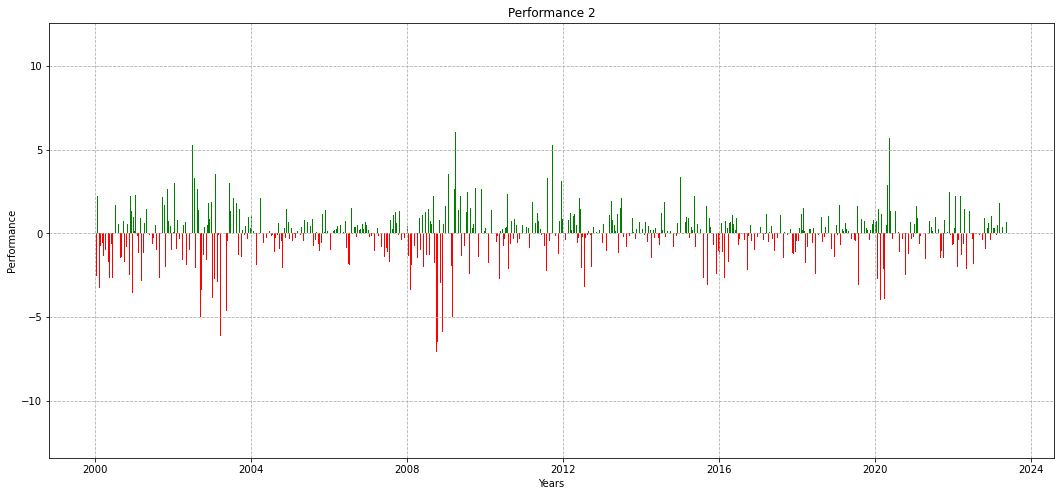

In [26]:
#fig,ax
fig, ax = plt.subplots(figsize=(18, 8))
plt.grid(True, linestyle='--')

#Performance colors
positive_Performance  = Performance [Performance  >= 0]
negative_Performance  = Performance [Performance  < 0]

#Histogram
ax.bar(positive_Performance.index, positive_Performance, color='green')
ax.bar(negative_Performance.index, negative_Performance, color='red')

ax.set_xlabel('Years')
ax.set_ylabel('Performance')
ax.set_title('Performance 2')

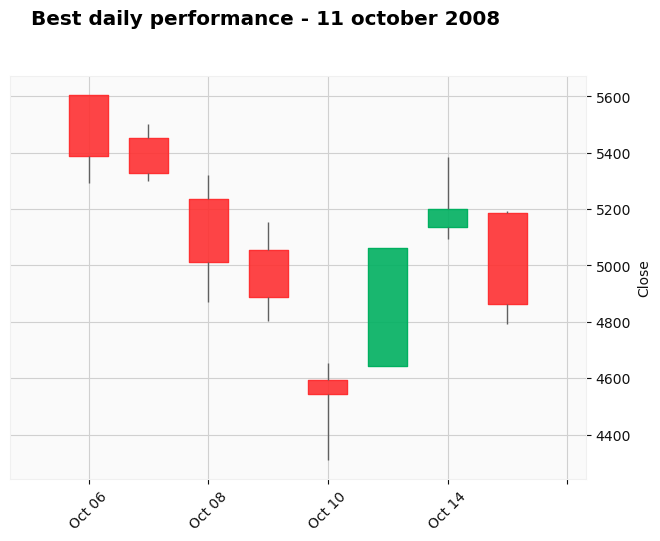

In [27]:
data_2008_oct = df.loc['2008-10-05':'2008-10-15']
#data_2008_oct.index = pd.to_datetime(data_2008_oct.index)
ohlc_data_2008_oct = data_2008_oct[['Open', 'High', 'Low', 'Close']]
mpf.plot(ohlc_data_2008_oct, type='candle', style='yahoo', title='Best daily performance - 11 october 2008', ylabel='Close')

In [28]:
Performance_cleaned = Performance.dropna()

top_increases = Performance_cleaned.sort_values(ascending=False).head(10)
top_decreases = Performance_cleaned.sort_values().head(10)

print("Top 10 best performances :")
print(top_increases)
print("\nTop 10 worse performances :")
print(top_decreases)

Top 10 best performances :
Date
2008-10-13 00:00:00+02:00    11.401954
2008-10-28 00:00:00+01:00    11.276831
2020-03-24 00:00:00+01:00    10.975900
2008-11-24 00:00:00+01:00    10.343530
2022-03-09 00:00:00+01:00     7.921281
2002-07-29 00:00:00+02:00     7.845209
2008-12-08 00:00:00+01:00     7.632362
2003-01-02 00:00:00+01:00     7.343150
2002-10-11 00:00:00+02:00     7.227820
2002-08-06 00:00:00+02:00     7.081152
Name: Close, dtype: float64

Top 10 worse performances :
Date
2020-03-12 00:00:00+01:00   -12.238615
2001-09-11 00:00:00+02:00    -8.492271
2020-03-09 00:00:00+01:00    -7.943692
2008-01-21 00:00:00+01:00    -7.163902
2008-10-06 00:00:00+02:00    -7.072933
2008-10-10 00:00:00+02:00    -7.012276
2008-11-06 00:00:00+01:00    -6.837801
2016-06-24 00:00:00+02:00    -6.823321
2008-10-15 00:00:00+02:00    -6.492551
2001-09-14 00:00:00+02:00    -6.293141
Name: Close, dtype: float64


## 6.Close Analysis

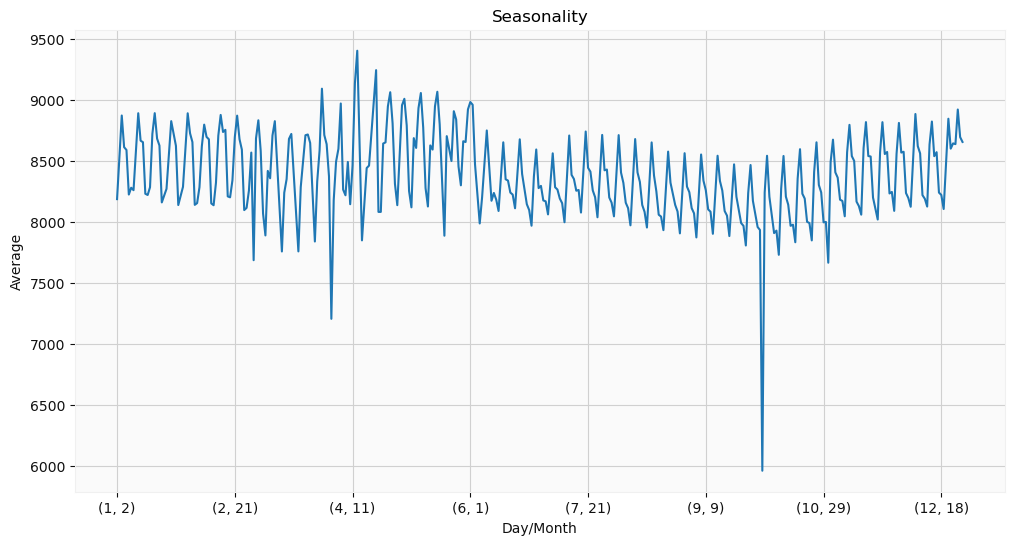

In [29]:
df = df.copy()
df.index = pd.to_datetime(df.index)
df.loc[:, 'Month'] = df.index.month
df.loc[:, 'Day'] = df.index.day
seasonality = df.groupby(['Month', 'Day'])['Close'].mean()
_=seasonality.plot(figsize=(12, 6), title='Seasonality', xlabel='Day/Month', ylabel='Average')

In [30]:
#Standard deviation
df['Daily_Range'] = df['High'] - df['Low']

#30 days rolling Volume
df['30D_Range'] = df['Volume'].rolling(window=30).mean()

Text(0, 0.5, 'Std')

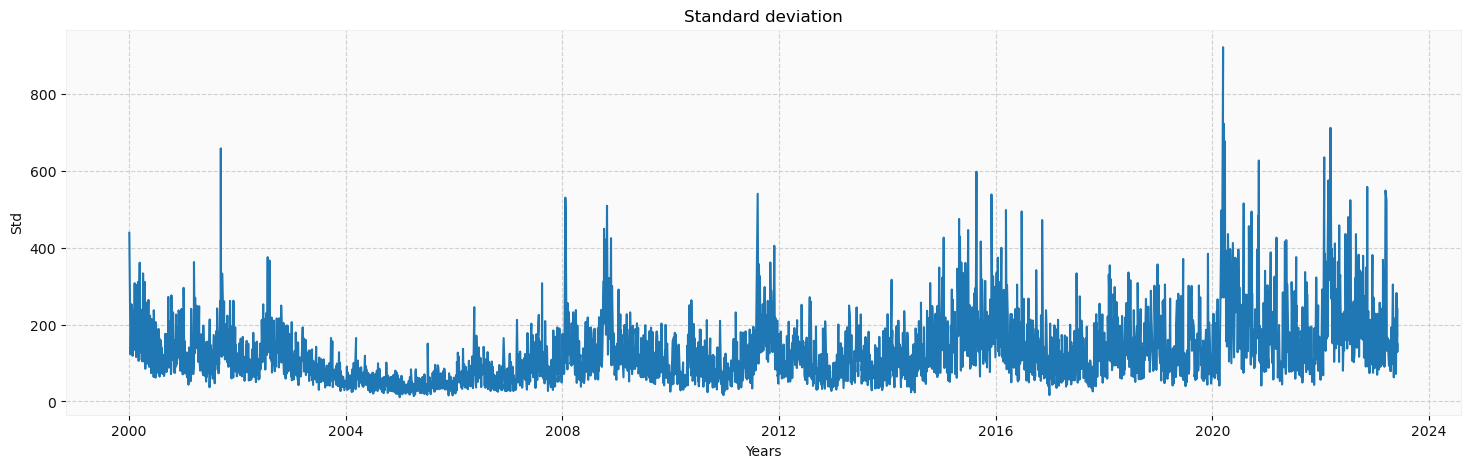

In [31]:
#Standard deviation
plt.figure(figsize=(18, 5))
plt.grid(True, linestyle='--')
plt.plot(df.index, df['Daily_Range'], label='30D Range')
plt.title('Standard deviation')
plt.xlabel("Years")
plt.ylabel("Std")

Text(0, 0.5, 'Volume')

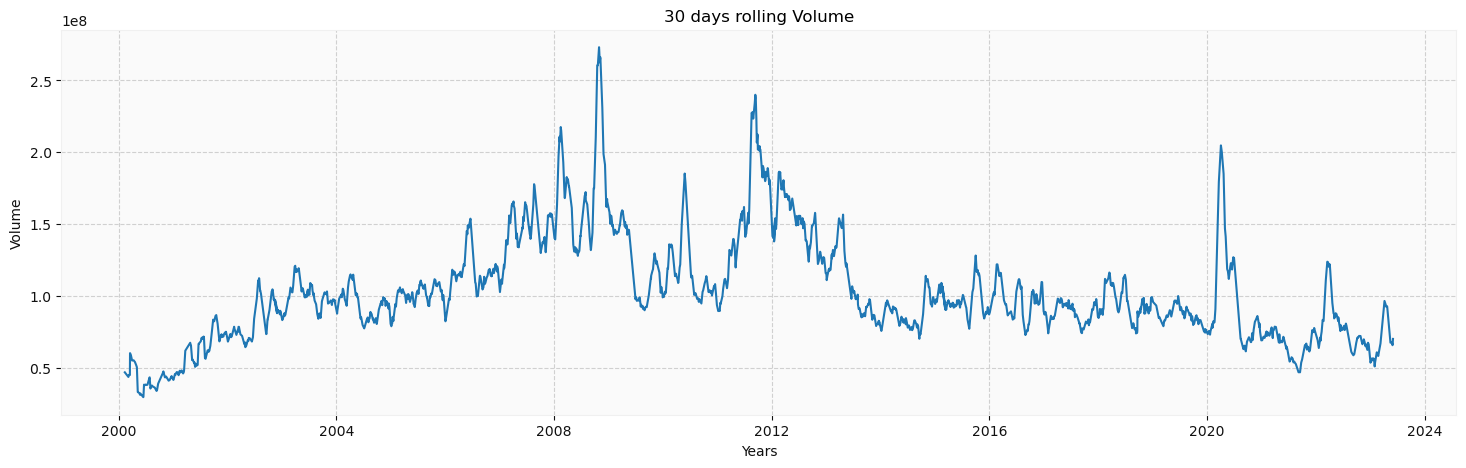

In [32]:
#30 days rolling Volume
plt.figure(figsize=(18, 5))
plt.grid(True, linestyle='--')
plt.plot(df.index, df['30D_Range'], label='30D Range')
plt.title('30 days rolling Volume')
plt.xlabel("Years")
plt.ylabel("Volume")

## 7.Features engineering

### 7.1 EMA

In [33]:
#EMAs
df['EMA_9'] = df['Close'].ewm(span=9, adjust=False).mean()
df['EMA_30'] = df['Close'].ewm(span=30, adjust=False).mean()
df['EMA_90'] = df['Close'].ewm(span=90, adjust=False).mean()
df['EMA_140'] = df['Close'].ewm(span=140, adjust=False).mean()

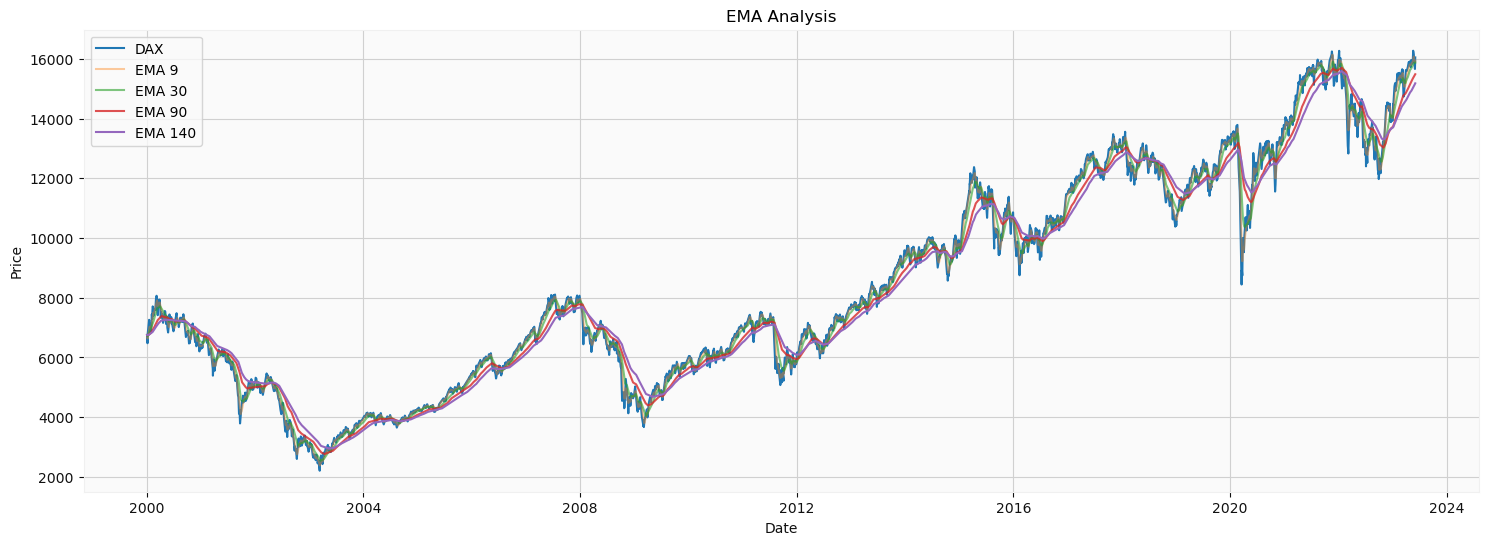

In [34]:
plt.figure(figsize=(18, 6))
plt.plot(df.index, df['Close'], label='DAX')
plt.plot(df.index, df['EMA_9'], label='EMA 9', alpha=0.4)
plt.plot(df.index, df['EMA_30'], label='EMA 30', alpha=0.6)
plt.plot(df.index, df['EMA_90'], label='EMA 90', alpha=0.8)
plt.plot(df.index, df['EMA_140'], label='EMA 140')
plt.title('EMA Analysis')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

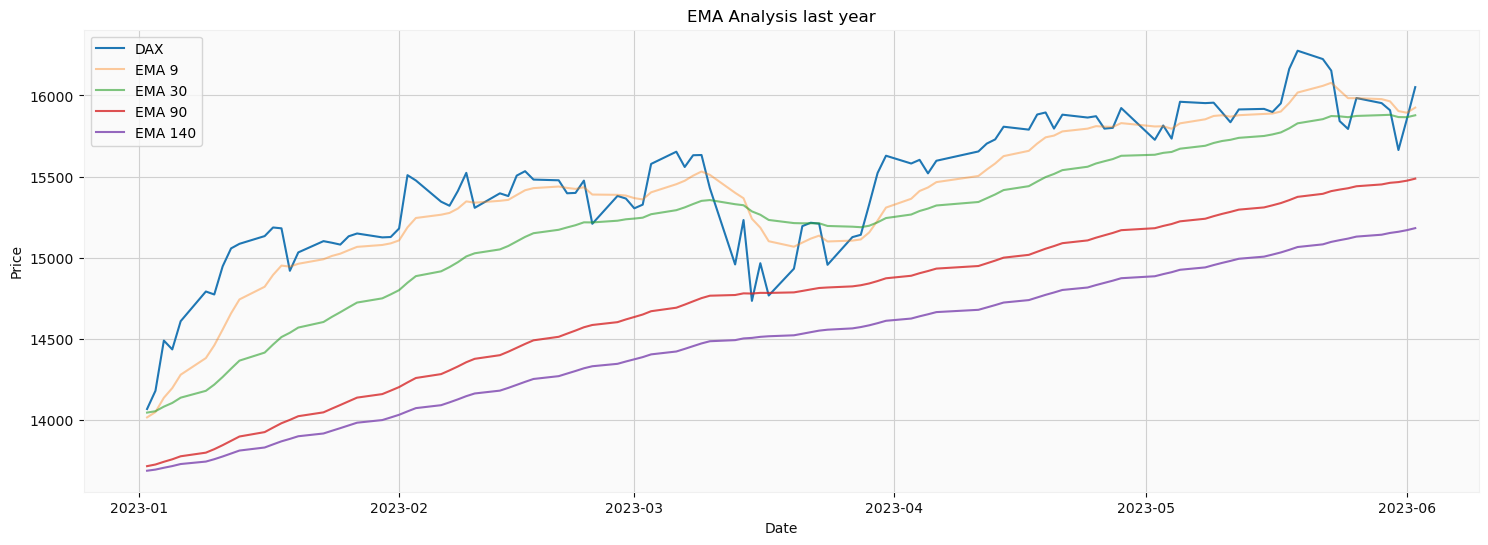

In [35]:
last_year = df.loc[df.index.year == df.index.year[-1]]
plt.figure(figsize=(18, 6))
plt.plot(last_year.index, last_year['Close'], label='DAX')
plt.plot(last_year.index, last_year['EMA_9'], label='EMA 9', alpha=0.4)
plt.plot(last_year.index, last_year['EMA_30'], label='EMA 30', alpha=0.6)
plt.plot(last_year.index, last_year['EMA_90'], label='EMA 90', alpha=0.8)
plt.plot(last_year.index, last_year['EMA_140'], label='EMA 140')
plt.title('EMA Analysis last year')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

### 7.2 RSI

In [36]:
window = 14

delta = df['Close'].diff()
gain = delta.mask(delta < 0, 0)
loss = -delta.mask(delta > 0, 0)

avg_gain = gain.rolling(window).mean()
avg_loss = loss.rolling(window).mean()

rs = avg_gain / avg_loss
rsi = 100 - (100 / (1 + rs))

df['RSI'] = rsi

In [37]:
last_year = df.loc[df.index.year == df.index.year[-1]]

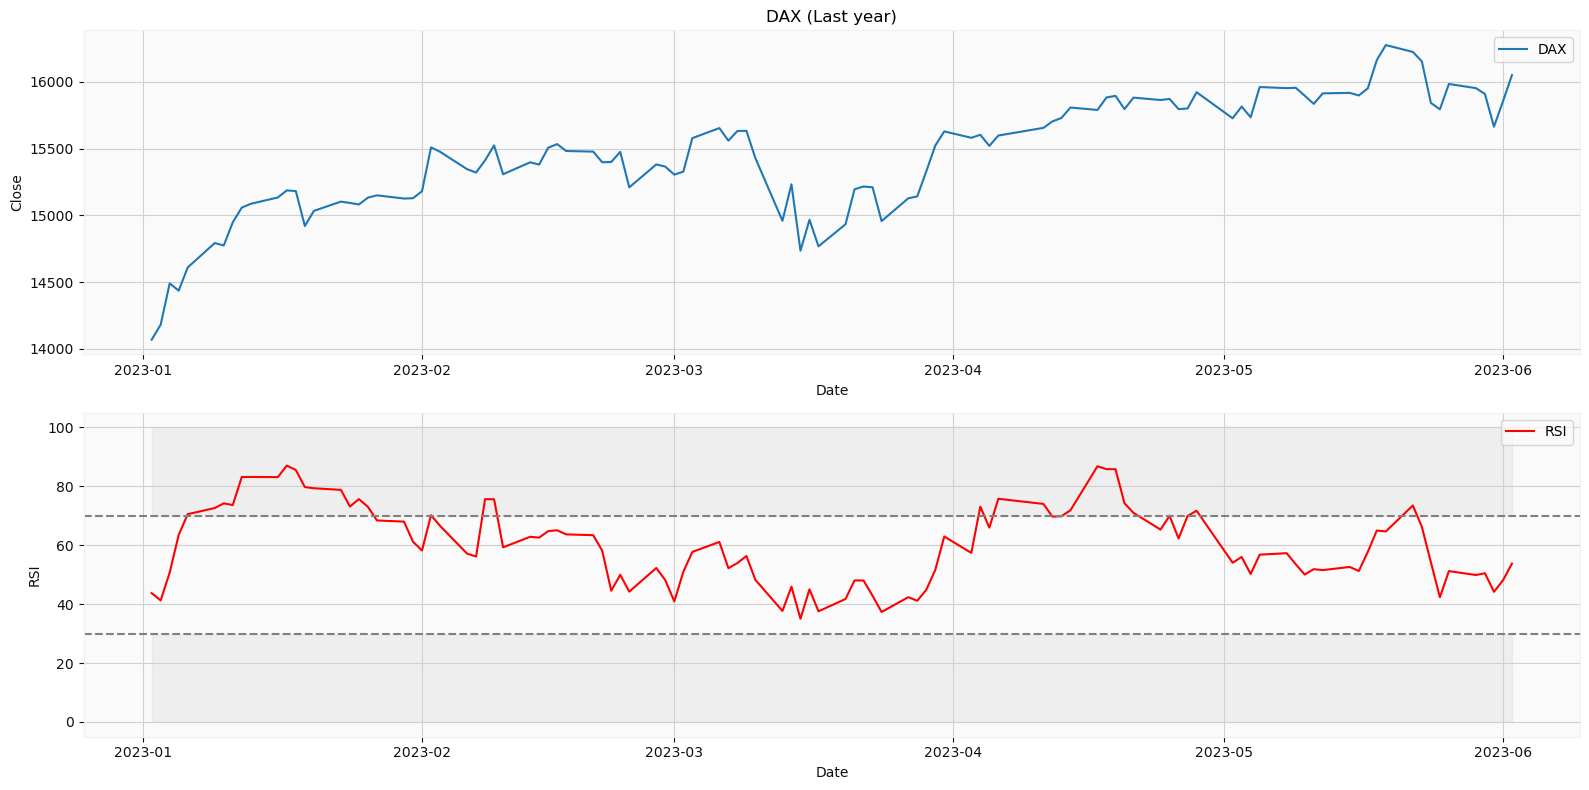

In [39]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 8))

#DAX
ax1.plot(last_year.index, last_year['Close'], label='DAX')
ax1.set_xlabel('Date')
ax1.set_ylabel('Close')
ax1.set_title('DAX (Last year)')
ax1.legend()

#RSI
ax2.plot(last_year.index, last_year['RSI'], color='red', label='RSI')
ax2.set_xlabel('Date')
ax2.set_ylabel('RSI')
ax2.axhline(70, color='gray', linestyle='--')  # Niveau de surachat
ax2.axhline(30, color='gray', linestyle='--')  # Niveau de survente
ax2.fill_between(last_year.index, 70, 100, color='lightgray', alpha=0.3)  # Zone de surachat
ax2.fill_between(last_year.index, 0, 30, color='lightgray', alpha=0.3)  # Zone de survente
ax2.legend(loc='upper right')

fig.tight_layout()

### 7.3 MACD

In [40]:
def calculate_ema(data, period):
    ema = [data[0]]
    alpha = 2 / (period + 1)
    
    for i in range(1, len(data)):
        ema.append((data[i] * alpha) + (ema[i-1] * (1 - alpha)))
    
    return ema

#MACD
def calculate_macd(data, short_period, long_period, signal_period):
    #EMA
    short_ema = calculate_ema(data, short_period)
    long_ema = calculate_ema(data, long_period)
    
    #MACD line
    macd_line = [short_ema[i] - long_ema[i] for i in range(len(data))]
    
    #Signal line
    signal_line = calculate_ema(macd_line, signal_period)
    
    return macd_line, signal_line

#Parameters
short_period = 9
long_period = 26
signal_period = 9

macd_line, signal_line = calculate_macd(df["Close"], short_period, long_period, signal_period)

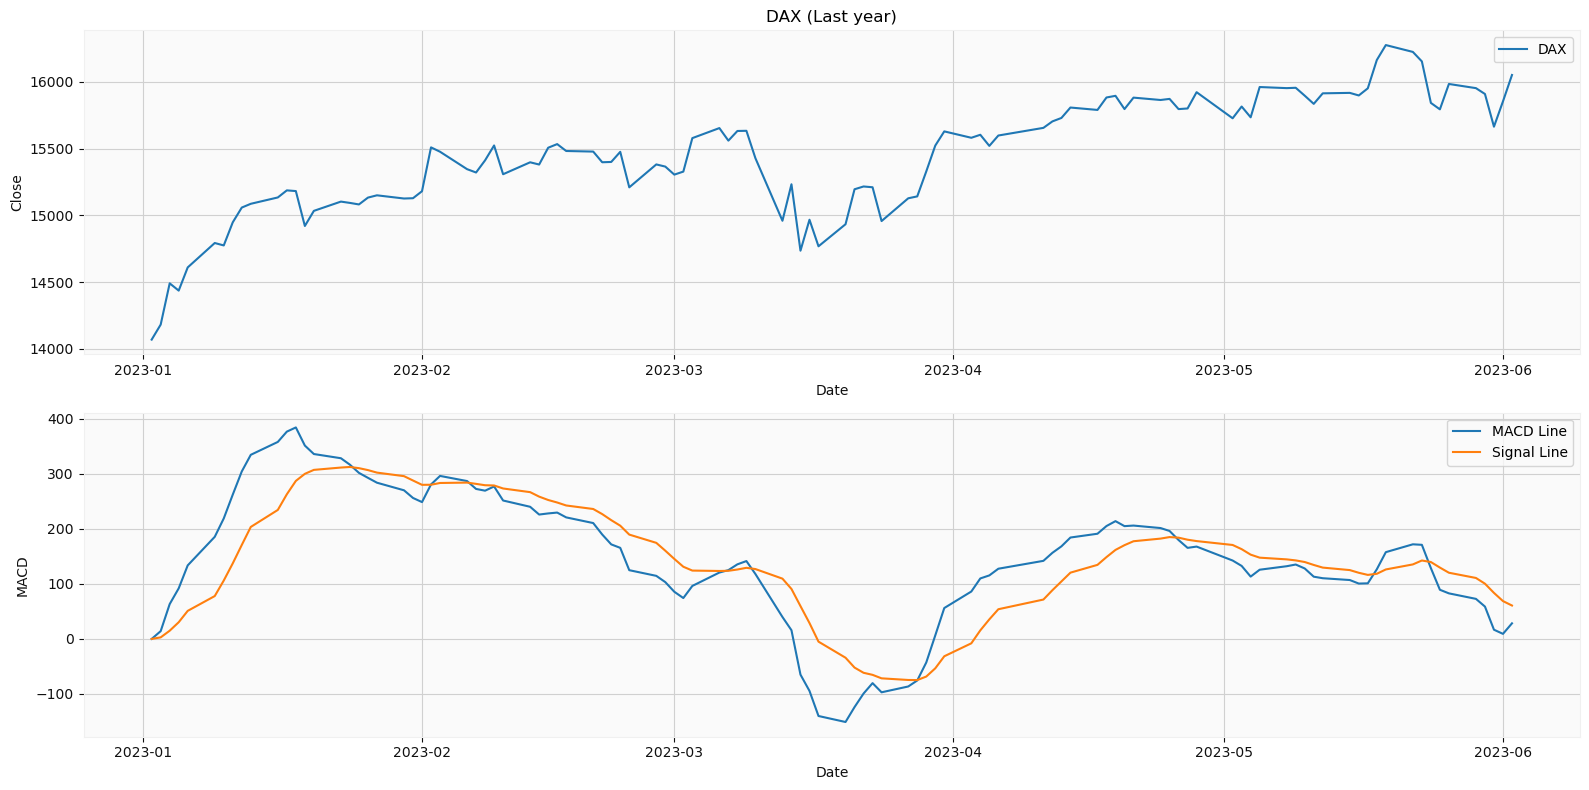

In [41]:
dax_prices = last_year['Close']
macd_line, signal_line = calculate_macd(dax_prices, short_period, long_period, signal_period)

plt.figure(figsize=(16, 8))

#DAX
plt.subplot(2, 1, 1)
plt.plot(last_year.index, dax_prices, label='DAX')
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('DAX (Last year)')
plt.legend()

#MACD
plt.subplot(2, 1, 2)
plt.plot(last_year.index, macd_line, label='MACD Line')
plt.plot(last_year.index, signal_line, label='Signal Line')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()


plt.tight_layout()

## 8.Correlation

### 8.1 Index worldwilde

In [42]:
#Index
Tickers = ['^GDAXI', '^GSPC', '^IXIC', '^DJI', '^RUT', '^FTSE', '^N225', '^HSI', '^BSESN', '^AXJO']

#Downloading
Index = yf.download(Tickers, start='2000-01-01', end='2023-06-03')
Index

[*********************100%***********************]  10 of 10 completed


Adj Close                                           \
                  ^AXJO        ^BSESN          ^DJI        ^FTSE   
Date                                                               
2000-01-03          NaN   5375.109863  11357.509766          NaN   
2000-01-04  3093.699951   5491.009766  10997.929688  6665.899902   
2000-01-05  3018.699951   5357.000000  11122.650391  6535.899902   
2000-01-06  2999.300049   5421.529785  11253.259766  6447.200195   
2000-01-07  3023.399902   5414.479980  11522.559570  6504.799805   
...                 ...           ...           ...          ...   
2023-05-29  7217.399902  62846.378906           NaN          NaN   
2023-05-30  7209.299805  62969.128906  33042.781250  7522.100098   
2023-05-31  7091.299805  62622.238281  32908.269531  7446.100098   
2023-06-01  7110.799805  62428.539062  33061.570312  7490.299805   
2023-06-02  7145.100098  62547.109375  33762.761719  7607.299805   

                                                                   \
                  ^GDAXI        ^GSPC          ^HSI         ^IXIC   
Date                                                                
2000-01-03   6750.759766  1455.219971  17369.630859   4131.149902   
2000-01-04   6586.950195  1399.420044  17072.820312   3901.689941   
2000-01-05   6502.069824  1402.109985  15846.719727   3877.540039   
2000-01-06   6474.919922  1403.449951  15153.230469   3727.129883   
2000-01-07   6780.959961  1441.469971  15405.629883   3882.620117   
...                  ...          ...           ...           ...   
2023-05-29  15952.730469          NaN  18551.109375           NaN   
2023-05-30  15908.910156  4205.520020  18595.779297  13017.429688   
2023-05-31  15664.019531  4179.830078  18234.269531  12935.290039   
2023-06-01  15853.660156  4221.020020  18216.910156  13100.980469   
2023-06-02  16051.230469  4282.370117  18949.939453  13240.769531   

                                       ...     Volume                       \
                   ^N225         ^RUT  ...      ^AXJO  ^BSESN         ^DJI   
Date                                   ...                                   
2000-01-03           NaN   496.420013  ...        NaN     0.0  169750000.0   
2000-01-04  19002.859375   478.380005  ...        0.0     0.0  178420000.0   
2000-01-05  18542.550781   478.829987  ...        0.0     0.0  203190000.0   
2000-01-06  18168.269531   475.339996  ...        0.0     0.0  176550000.0   
2000-01-07  18193.410156   488.309998  ...        0.0     0.0  184900000.0   
...                  ...          ...  ...        ...     ...          ...   
2023-05-29  31233.539062          NaN  ...   502600.0  9600.0          NaN   
2023-05-30  31328.160156  1767.290039  ...   662500.0  7800.0  322700000.0   
2023-05-31  30887.880859  1749.650024  ...  1567300.0  7300.0  689990000.0   
2023-06-01  31148.009766  1767.939941  ...   676600.0  8000.0  349460000.0   
2023-06-02  31524.220703  1830.910034  ...   632300.0  6300.0  383590000.0   

                                                                   \
                   ^FTSE       ^GDAXI         ^GSPC          ^HSI   
Date                                                                
2000-01-03           NaN   43072500.0  9.318000e+08  0.000000e+00   
2000-01-04  6.334490e+08   46678400.0  1.009000e+09  0.000000e+00   
2000-01-05  6.702340e+08   52682800.0  1.085500e+09  0.000000e+00   
2000-01-06  7.855320e+08   41180600.0  1.092300e+09  0.000000e+00   
2000-01-07  8.883060e+08   56058900.0  1.225200e+09  0.000000e+00   
...                  ...          ...           ...           ...   
2023-05-29           NaN   24247000.0           NaN  2.196595e+09   
2023-05-30  8.566824e+08   54563500.0  4.228510e+09  2.244980e+09   
2023-05-31  2.295618e+09  172555100.0  5.980670e+09  4.372924e+09   
2023-06-01  9.673473e+08   55198400.0  4.391860e+09  2.622765e+09   
2023-06-02  6.386969e+08   96604000.0  4.454200e+09  3.731528e+09   

                                  

In [43]:
#Rename Tickers columns
column_names = {
    '^AXJO': 'S&P/ASX 200',
    '^BSESN': 'BSE SENSEX',
    '^GSPC': 'S&P 500',
    '^DJI': 'Dow Jones Industrial Average',
    '^IXIC': 'NASDAQ Composite',
    '^RUT': 'Russell 2000',
    '^FTSE': 'FTSE 100',
    '^GDAXI': 'DAX Performance Index',
    '^FCHI': 'CAC 40',
    '^N225': 'Nikkei 225',
    '^HSI': 'Hang Seng Index',
    '^BVSP': 'Bovespa Index'
}

Index = Index.rename(columns=column_names)
Index

Adj Close                                             \
            S&P/ASX 200    BSE SENSEX Dow Jones Industrial Average   
Date                                                                 
2000-01-03          NaN   5375.109863                 11357.509766   
2000-01-04  3093.699951   5491.009766                 10997.929688   
2000-01-05  3018.699951   5357.000000                 11122.650391   
2000-01-06  2999.300049   5421.529785                 11253.259766   
2000-01-07  3023.399902   5414.479980                 11522.559570   
...                 ...           ...                          ...   
2023-05-29  7217.399902  62846.378906                          NaN   
2023-05-30  7209.299805  62969.128906                 33042.781250   
2023-05-31  7091.299805  62622.238281                 32908.269531   
2023-06-01  7110.799805  62428.539062                 33061.570312   
2023-06-02  7145.100098  62547.109375                 33762.761719   

                                                                            \
               FTSE 100 DAX Performance Index      S&P 500 Hang Seng Index   
Date                                                                         
2000-01-03          NaN           6750.759766  1455.219971    17369.630859   
2000-01-04  6665.899902           6586.950195  1399.420044    17072.820312   
2000-01-05  6535.899902           6502.069824  1402.109985    15846.719727   
2000-01-06  6447.200195           6474.919922  1403.449951    15153.230469   
2000-01-07  6504.799805           6780.959961  1441.469971    15405.629883   
...                 ...                   ...          ...             ...   
2023-05-29          NaN          15952.730469          NaN    18551.109375   
2023-05-30  7522.100098          15908.910156  4205.520020    18595.779297   
2023-05-31  7446.100098          15664.019531  4179.830078    18234.269531   
2023-06-01  7490.299805          15853.660156  4221.020020    18216.910156   
2023-06-02  7607.299805          16051.230469  4282.370117    18949.939453   

                                                        ...      Volume  \
           NASDAQ Composite    Nikkei 225 Russell 2000  ... S&P/ASX 200   
Date                                                    ...               
2000-01-03      4131.149902           NaN   496.420013  ...         NaN   
2000-01-04      3901.689941  19002.859375   478.380005  ...         0.0   
2000-01-05      3877.540039  18542.550781   478.829987  ...         0.0   
2000-01-06      3727.129883  18168.269531   475.339996  ...         0.0   
2000-01-07      3882.620117  18193.410156   488.309998  ...         0.0   
...                     ...           ...          ...  ...         ...   
2023-05-29              NaN  31233.539062          NaN  ...    502600.0   
2023-05-30     13017.429688  31328.160156  1767.290039  ...    662500.0   
2023-05-31     12935.290039  30887.880859  1749.650024  ...   1567300.0   
2023-06-01     13100.980469  31148.009766  1767.939941  ...    676600.0   
2023-06-02     13240.769531  31524.220703  1830.910034  ...    632300.0   

                                                                  \
           BSE SENSEX Dow Jones Industrial Average      FTSE 100   
Date                                                               
2000-01-03        0.0                  169750000.0           NaN   
2000-01-04        0.0                  178420000.0  6.334490e+08   
2000-01-05        0.0                  203190000.0  6.702340e+08   
2000-01-06        0.0                  176550000.0  7.855320e+08   
2000-01-07        0.0                  184900000.0  8.883060e+08   
...               ...                          ...           ...   
2023-05-29     9600.0                          NaN           NaN   
2023-05-30     7800.0                  322700000.0  8.566824e+08   
2023-05-31     7300.0                  689990000.0  2.295618e+09   
2023-06-01     8000.0                  349460000.0  9.673473e+08   
2023-

In [44]:
Index_close = Index["Close"]
Index_close

,S&P/ASX 200,BSE SENSEX,Dow Jones Industrial Average,FTSE 100,DAX Performance Index,S&P 500,Hang Seng Index,NASDAQ Composite,Nikkei 225,Russell 2000
Date,,,,,,,,,,
2000-01-03,NaN,5375.109863,11357.509766,NaN,6750.759766,1455.219971,17369.630859,4131.149902,NaN,496.420013
2000-01-04,3093.699951,5491.009766,10997.929688,6665.899902,6586.950195,1399.420044,17072.820312,3901.689941,19002.859375,478.380005
2000-01-05,3018.699951,5357.000000,11122.650391,6535.899902,6502.069824,1402.109985,15846.719727,3877.540039,18542.550781,478.829987
2000-01-06,2999.300049,5421.529785,11253.259766,6447.200195,6474.919922,1403.449951,15153.230469,3727.129883,18168.269531,475.339996
2000-01-07,3023.399902,5414.479980,11522.559570,6504.799805,6780.959961,1441.469971,15405.629883,3882.620117,18193.410156,488.309998
...,...,...,...,...,...,...,...,...,...,...
2023-05-29,7217.399902,62846.378906,NaN,NaN,15952.730469,NaN,18551.109375,NaN,31233.539062,NaN
2023-05-30,7209.299805,62969.128906,33042.781250,7522.100098,15908.910156,4205.520020,18595.779297,13017.429688,31328.160156,1767.290039
2023-05-31,7091.299805,62622.238281,32908.269531,7446.100098,15664.019531,4179.830078,18234.269531,12935.290039,30887.880859,1749.650024


#### Cleaning

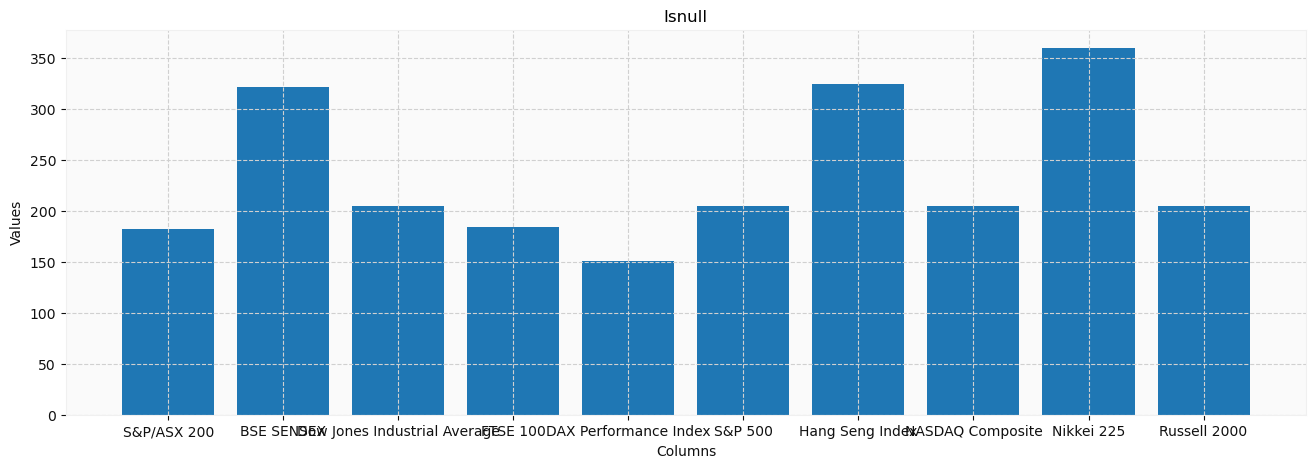

In [45]:
missing_values = (Index_close.isnull().sum())

#isnull
fig = plt.figure(figsize=(16, 5))
plt.bar(missing_values.index, missing_values.values)
plt.title("Isnull")
plt.xlabel("Columns")
plt.ylabel("Values")
plt.grid(True, linestyle='--')

In [46]:
Index_close = Index_close.dropna()

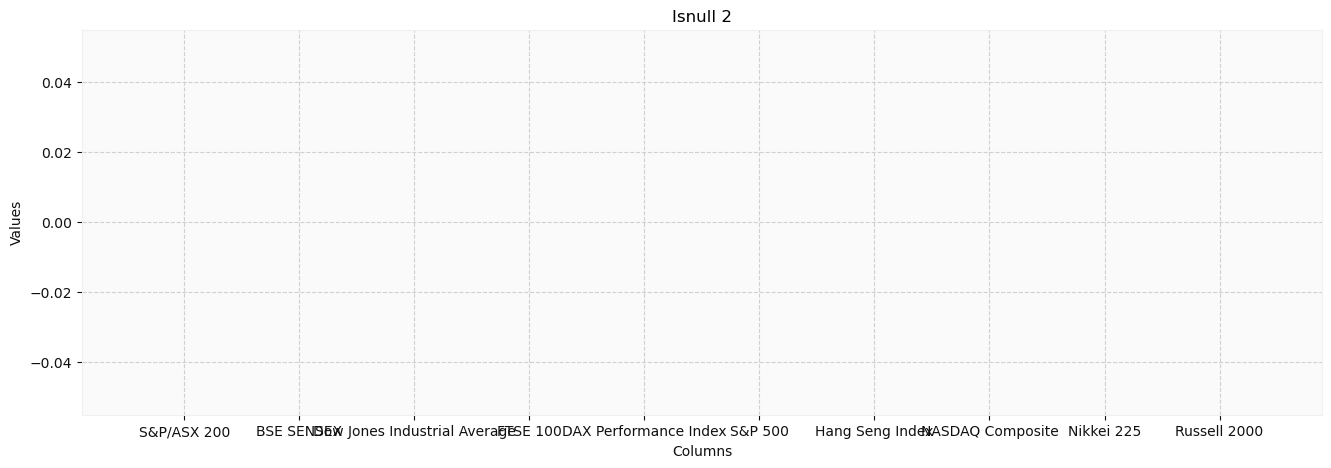

In [47]:
missing_values = (Index_close.isnull().sum())

#isnull
fig = plt.figure(figsize=(16, 5))
plt.bar(missing_values.index, missing_values.values)
plt.title("Isnull 2")
plt.xlabel("Columns")
plt.ylabel("Values")
plt.grid(True, linestyle='--')

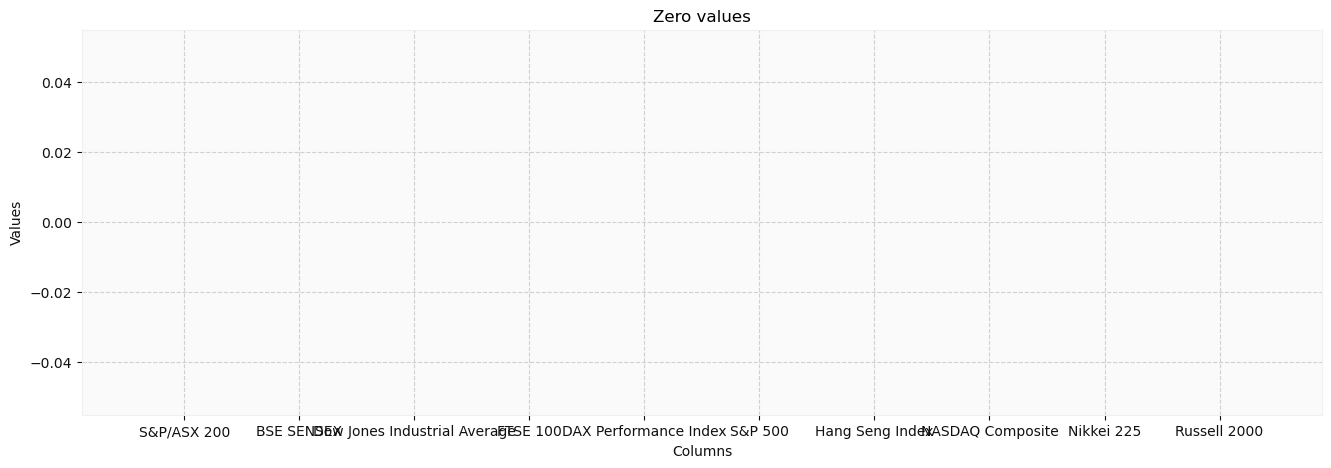

In [48]:
Values_zero = (Index_close == 0).sum()

#Zero
fig = plt.figure(figsize=(16, 5))
plt.bar(Values_zero.index, Values_zero.values)
plt.title("Zero values")
plt.xlabel("Columns")
plt.ylabel("Values")
plt.grid(True, linestyle='--')

### 8.2 Index by differents activities

In [49]:
Tickers = ["XLV", "XLK", "XLRE", "XLE", "XLF", "IBB", "XLY", "XLB", "XLI", "XLC"]

Index_activities = yf.download(Tickers, start="2000-01-01", end="2023-06-02")

Index_activities_close = Index_activities["Close"]
Index_activities_close

[*********************100%***********************]  10 of 10 completed


,IBB,XLB,XLC,XLE,XLF,XLI,XLK,XLRE,XLV,XLY
Date,,,,,,,,,,
2000-01-03,NaN,25.968750,NaN,26.562500,18.582453,28.843750,55.437500,NaN,30.296875,30.125000
2000-01-04,NaN,25.718750,NaN,26.062500,17.770105,28.046875,52.625000,NaN,29.609375,29.218750
2000-01-05,NaN,26.781250,NaN,26.750000,17.630484,27.921875,51.843750,NaN,29.343750,28.859375
2000-01-06,NaN,27.468750,NaN,27.781250,18.404753,28.296875,50.125000,NaN,29.437500,29.187500
2000-01-07,NaN,27.453125,NaN,28.078125,18.709383,29.375000,51.000000,NaN,29.796875,30.562500
...,...,...,...,...,...,...,...,...,...,...
2023-05-25,126.839996,75.860001,60.919998,79.080002,31.850000,97.610001,160.229996,35.290001,127.790001,148.479996
2023-05-26,127.089996,76.239998,62.160000,78.769997,32.110001,98.339996,164.779999,35.700001,127.529999,151.970001
2023-05-30,126.169998,75.830002,62.259998,77.959999,32.099998,98.190002,165.660004,35.810001,126.739998,152.990005


In [50]:
#Rename Tickers columns
column_names = {
    "XLV": "Health Care Select Sector SPDR Fund",
    "XLK": "Technology Select Sector SPDR Fund",
    "XLRE": "Real Estate Select Sector SPDR Fund",
    "XLE": "Energy Select Sector SPDR Fund",
    "XLF": "Financial Select Sector SPDR Fund",
    "IBB": "iShares Nasdaq Biotechnology ETF",
    "XLY": "Consumer Discretionary Select Sector SPDR Fund",
    "XLB": "Materials Select Sector SPDR Fund",
    "XLI": "Industrial Select Sector SPDR Fund",
    "XLC": "Communication Services Select Sector SPDR Fund"
}

Index_activities_close = Index_activities_close.rename(columns=column_names)
Index_activities_close

,iShares Nasdaq Biotechnology ETF,Materials Select Sector SPDR Fund,Communication Services Select Sector SPDR Fund,Energy Select Sector SPDR Fund,Financial Select Sector SPDR Fund,Industrial Select Sector SPDR Fund,Technology Select Sector SPDR Fund,Real Estate Select Sector SPDR Fund,Health Care Select Sector SPDR Fund,Consumer Discretionary Select Sector SPDR Fund
Date,,,,,,,,,,
2000-01-03,NaN,25.968750,NaN,26.562500,18.582453,28.843750,55.437500,NaN,30.296875,30.125000
2000-01-04,NaN,25.718750,NaN,26.062500,17.770105,28.046875,52.625000,NaN,29.609375,29.218750
2000-01-05,NaN,26.781250,NaN,26.750000,17.630484,27.921875,51.843750,NaN,29.343750,28.859375
2000-01-06,NaN,27.468750,NaN,27.781250,18.404753,28.296875,50.125000,NaN,29.437500,29.187500
2000-01-07,NaN,27.453125,NaN,28.078125,18.709383,29.375000,51.000000,NaN,29.796875,30.562500
...,...,...,...,...,...,...,...,...,...,...
2023-05-25,126.839996,75.860001,60.919998,79.080002,31.850000,97.610001,160.229996,35.290001,127.790001,148.479996
2023-05-26,127.089996,76.239998,62.160000,78.769997,32.110001,98.339996,164.779999,35.700001,127.529999,151.970001
2023-05-30,126.169998,75.830002,62.259998,77.959999,32.099998,98.190002,165.660004,35.810001,126.739998,152.990005


#### Cleaning

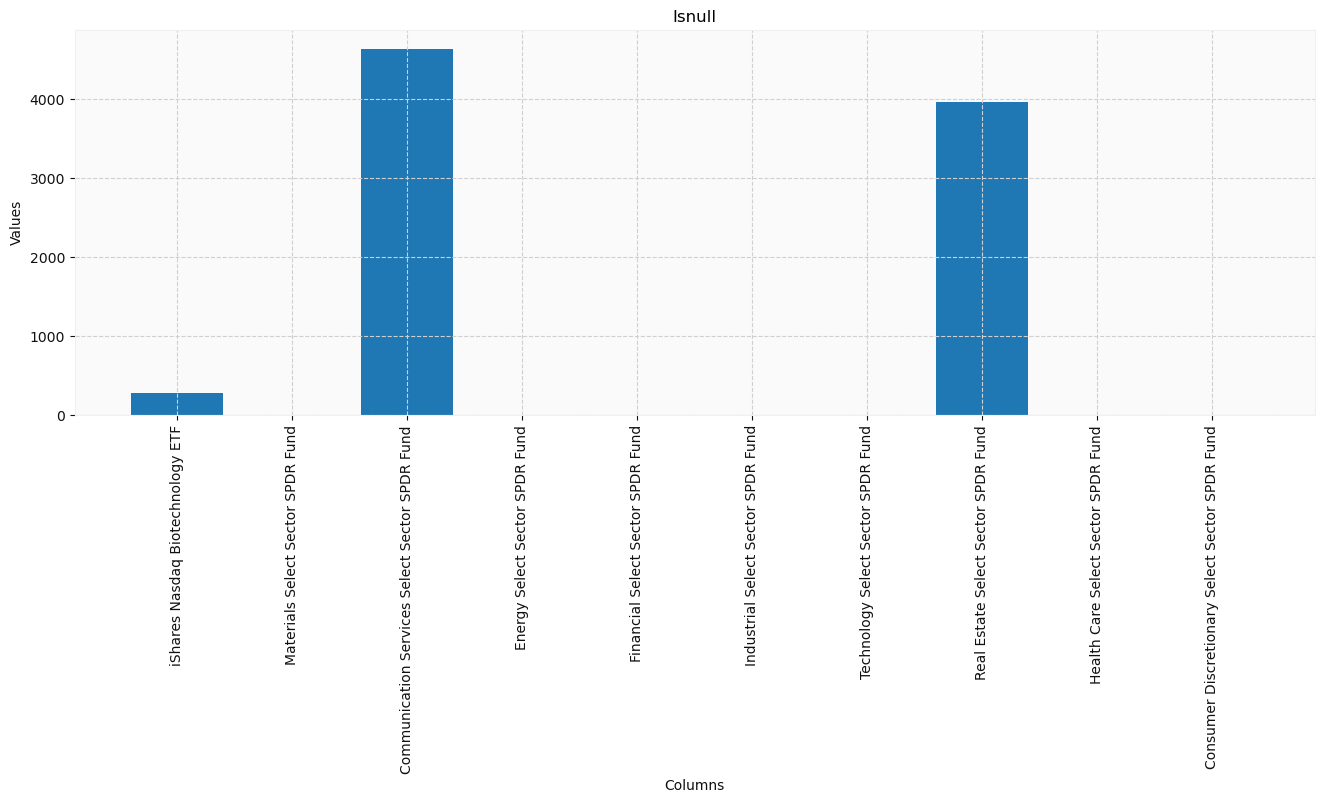

In [51]:
missing_values = (Index_activities_close.isnull().sum())

#isnull
fig = plt.figure(figsize=(16, 5))
plt.bar(missing_values.index, missing_values.values)
plt.title("Isnull")
plt.xlabel("Columns")
plt.ylabel("Values")
plt.xticks(rotation=90)
plt.grid(True, linestyle='--')

In [52]:
Index_activities_close = Index_activities_close.dropna()

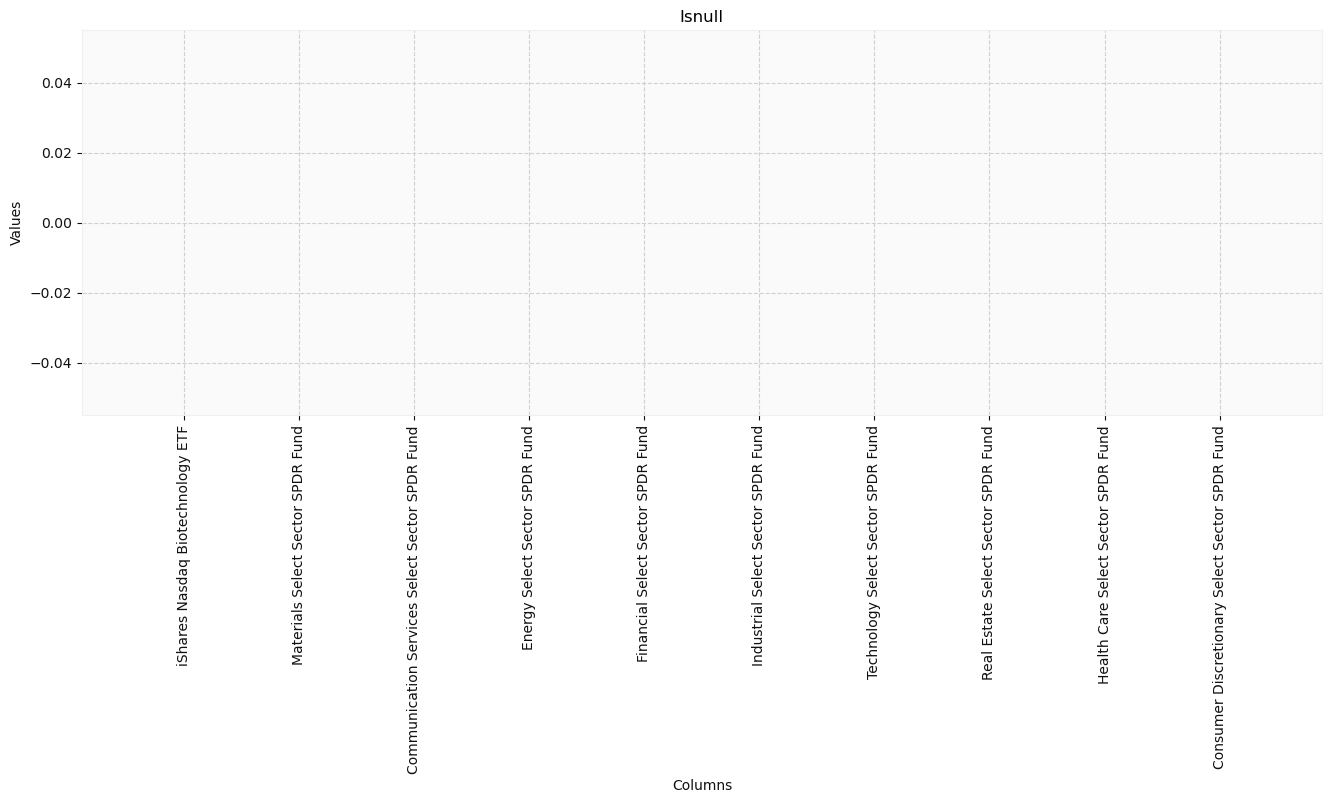

In [53]:
missing_values = (Index_activities_close.isnull().sum())

#isnull
fig = plt.figure(figsize=(16, 5))
plt.bar(missing_values.index, missing_values.values)
plt.title("Isnull")
plt.xlabel("Columns")
plt.ylabel("Values")
plt.xticks(rotation=90)
plt.grid(True, linestyle='--')

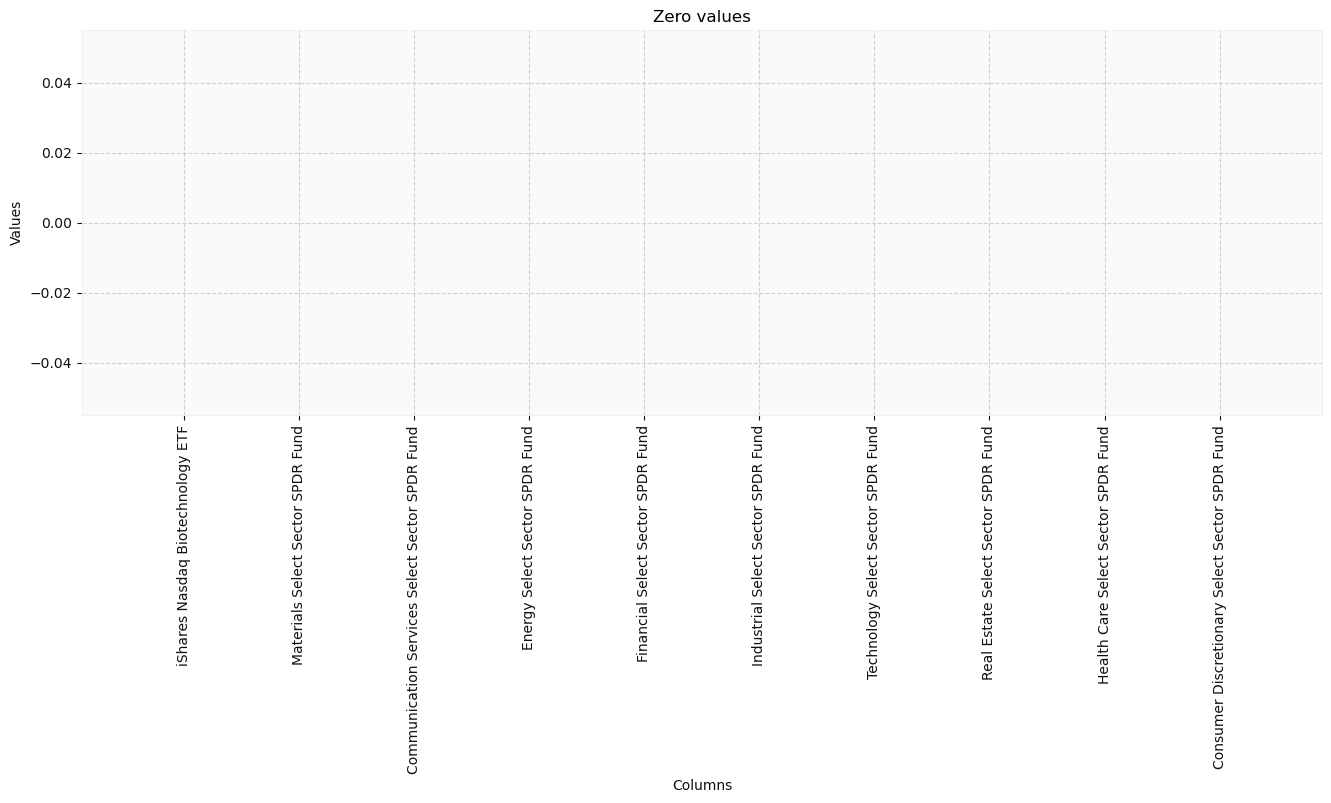

In [54]:
Values_zero = (Index_activities_close == 0).sum()

#Zero
fig = plt.figure(figsize=(16, 5))
plt.bar(Values_zero.index, Values_zero.values)
plt.title("Zero values")
plt.xlabel("Columns")
plt.ylabel("Values")
plt.xticks(rotation=90)
plt.grid(True, linestyle='--')

In [55]:
combined_df = pd.concat([Index_close, Index_activities_close], axis=1)
combined_df

,S&P/ASX 200,BSE SENSEX,Dow Jones Industrial Average,FTSE 100,DAX Performance Index,S&P 500,Hang Seng Index,NASDAQ Composite,Nikkei 225,Russell 2000,iShares Nasdaq Biotechnology ETF,Materials Select Sector SPDR Fund,Communication Services Select Sector SPDR Fund,Energy Select Sector SPDR Fund,Financial Select Sector SPDR Fund,Industrial Select Sector SPDR Fund,Technology Select Sector SPDR Fund,Real Estate Select Sector SPDR Fund,Health Care Select Sector SPDR Fund,Consumer Discretionary Select Sector SPDR Fund
Date,,,,,,,,,,,,,,,,,,,,
2000-01-04,3093.699951,5491.009766,10997.929688,6665.899902,6586.950195,1399.420044,17072.820312,3901.689941,19002.859375,478.380005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,3018.699951,5357.000000,11122.650391,6535.899902,6502.069824,1402.109985,15846.719727,3877.540039,18542.550781,478.829987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,2999.300049,5421.529785,11253.259766,6447.200195,6474.919922,1403.449951,15153.230469,3727.129883,18168.269531,475.339996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,3023.399902,5414.479980,11522.559570,6504.799805,6780.959961,1441.469971,15405.629883,3882.620117,18193.410156,488.309998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-11,3160.800049,5296.299805,11511.080078,6518.899902,6891.250000,1438.560059,15862.099609,3921.189941,18850.919922,492.609985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127.089996,76.239998,62.160000,78.769997,32.110001,98.339996,164.779999,35.700001,127.529999,151.970001
2023-05-30,7209.299805,62969.128906,33042.781250,7522.100098,15908.910156,4205.520020,18595.779297,13017.429688,31328.160156,1767.290039,126.169998,75.830002,62.259998,77.959999,32.099998,98.190002,165.660004,35.810001,126.739998,152.990005
2023-05-31,7091.299805,62622.238281,32908.269531,7446.100098,15664.019531,4179.830078,18234.269531,12935.290039,30887.880859,1749.650024,126.279999,75.019997,62.240002,76.589996,31.760000,96.849998,164.279999,36.040001,127.830002,151.610001


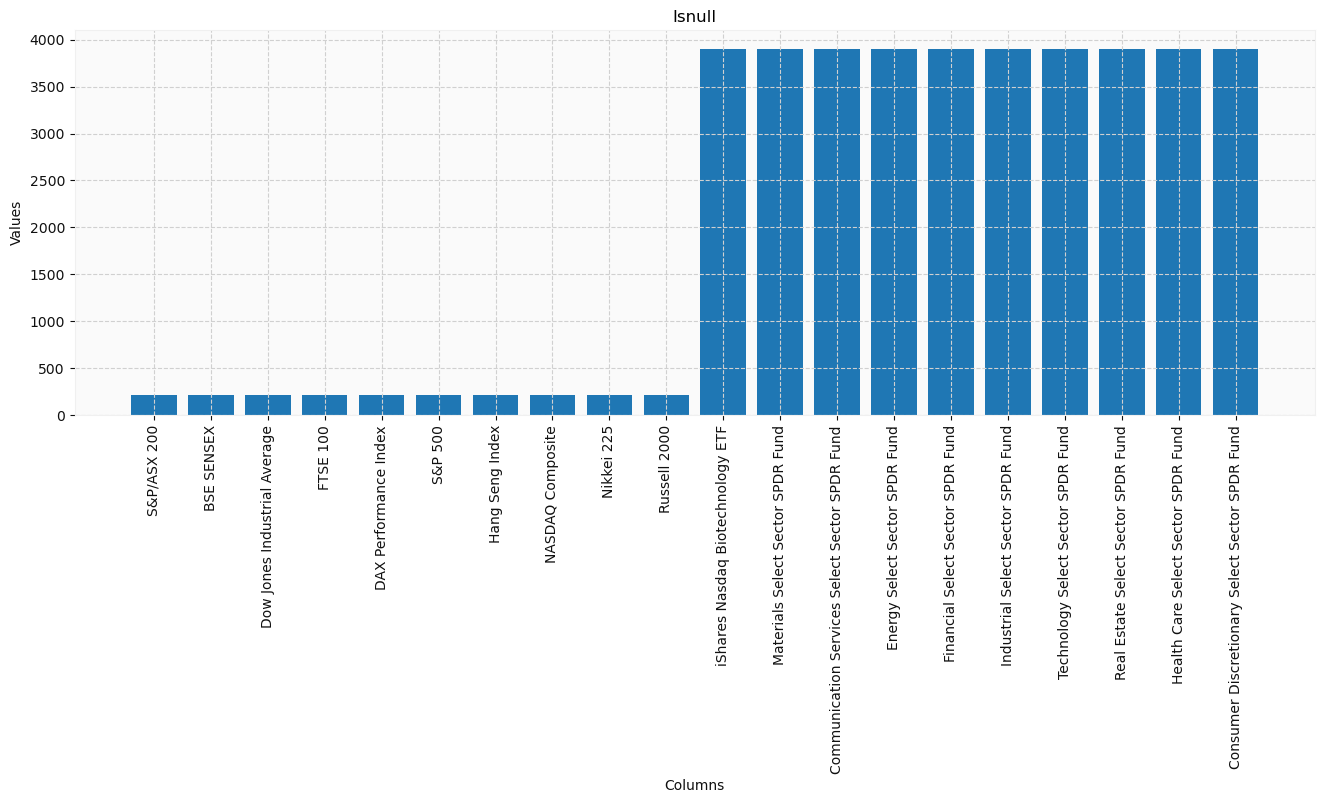

In [56]:
missing_values = (combined_df.isnull().sum())

#isnull
fig = plt.figure(figsize=(16, 5))
plt.bar(missing_values.index, missing_values.values)
plt.title("Isnull")
plt.xlabel("Columns")
plt.ylabel("Values")
plt.xticks(rotation=90)
plt.grid(True, linestyle='--')

## 9.Correlation Matrix

Text(0.5, 1.0, 'Correlation matrix')

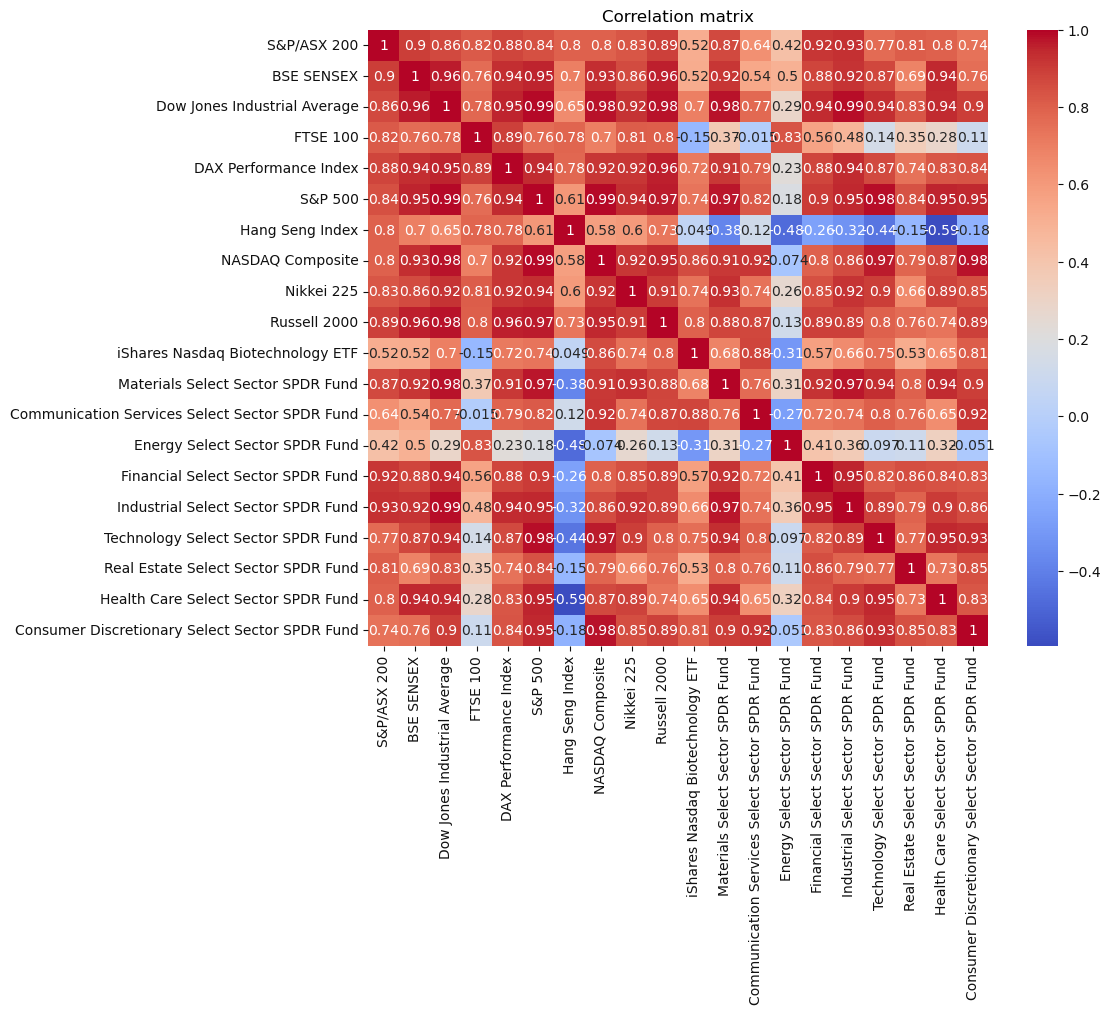

In [57]:
corr_matrix = combined_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation matrix")

Text(0.5, 1.0, 'Heatmap - DAX Performance Index')

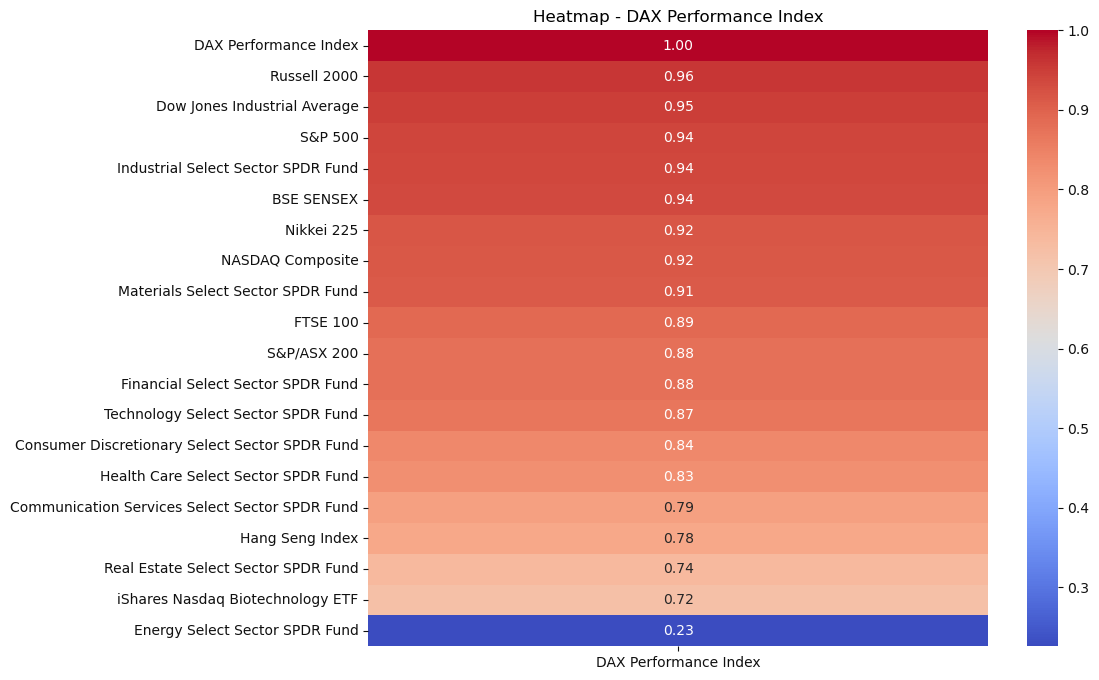

In [58]:
correlation_gdaxi = combined_df.corr()['DAX Performance Index']
correlation_gdaxi = correlation_gdaxi.sort_values(ascending=False)

#Heatmap DAX
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_gdaxi.to_frame(), cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Heatmap - DAX Performance Index")